# Flagship vs Pancan Comparison

This notebooks compares the mutation type abundance for EGFR between the flagship and harmonized pancan pipelines. 

# Part 1: EGFR mutation status

# Step 1: Flagship EGFR mutation status

Make a figure which shows the mutation type abundance for EGFR across the different cancers. 

First import cptac and load datasets

In [1]:
import cptac
cptac.version() 
import warnings
warnings.filterwarnings('ignore')

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plot_utils as p

In [3]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
ls = cptac.Lscc()

Second, call get_geneotype_all_vars for EGFR for each cancer type. This returns a df with mutation, location, and mutation_status. For individuals with multiple mutations, we report a single mutation type based on the following priority: deletion, truncation, missense, amplification, inframe, silent, and wildtype.

In [4]:
endo = en.get_genotype_all_vars("EGFR")
gbm = g.get_genotype_all_vars("EGFR")
hnscc = hn.get_genotype_all_vars("EGFR")
ovar = o.get_genotype_all_vars("EGFR")
cc = c.get_genotype_all_vars("EGFR")
colon = col.get_genotype_all_vars("EGFR")
ld = l.get_genotype_all_vars("EGFR")
brca = b.get_genotype_all_vars("EGFR")
lscc = ls.get_genotype_all_vars("EGFR")

In [5]:
#example 
gbm.head()

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00104,Amplification,Amplification,Single_mutation
C3L-00365,Missense_Mutation,p.G665D,Multiple_mutation
C3L-00674,Amplification,Amplification,Single_mutation
C3L-00677,Amplification,Amplification,Single_mutation
C3L-01040,Amplification,Amplification,Single_mutation


# Step 2: Match Mutation Labels

Change labels to match desired final figure and have nameing be more consistent across cancer type.

In [6]:
# Simplify mutation names
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replaces when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    
# change colon labels to match other cancers. Nonsynonymous in this case is missense and nonframeshift insertion is Indel.
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense')
colon["Mutation"] = colon['Mutation'].replace(['nonframeshift insertion'], 'Indel')

In [7]:
#Drop Silent mutation type
indexNames = hnscc[ hnscc['Mutation'] == "Silent" ].index
hnscc.drop(indexNames , inplace=True)
indexNames = ld[ ld['Mutation'] == "Silent" ].index
ld.drop(indexNames , inplace=True)
indexNames = brca[ brca['Mutation'] == "Silent" ].index
brca.drop(indexNames , inplace=True)


# Step 3: Create figure

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function.

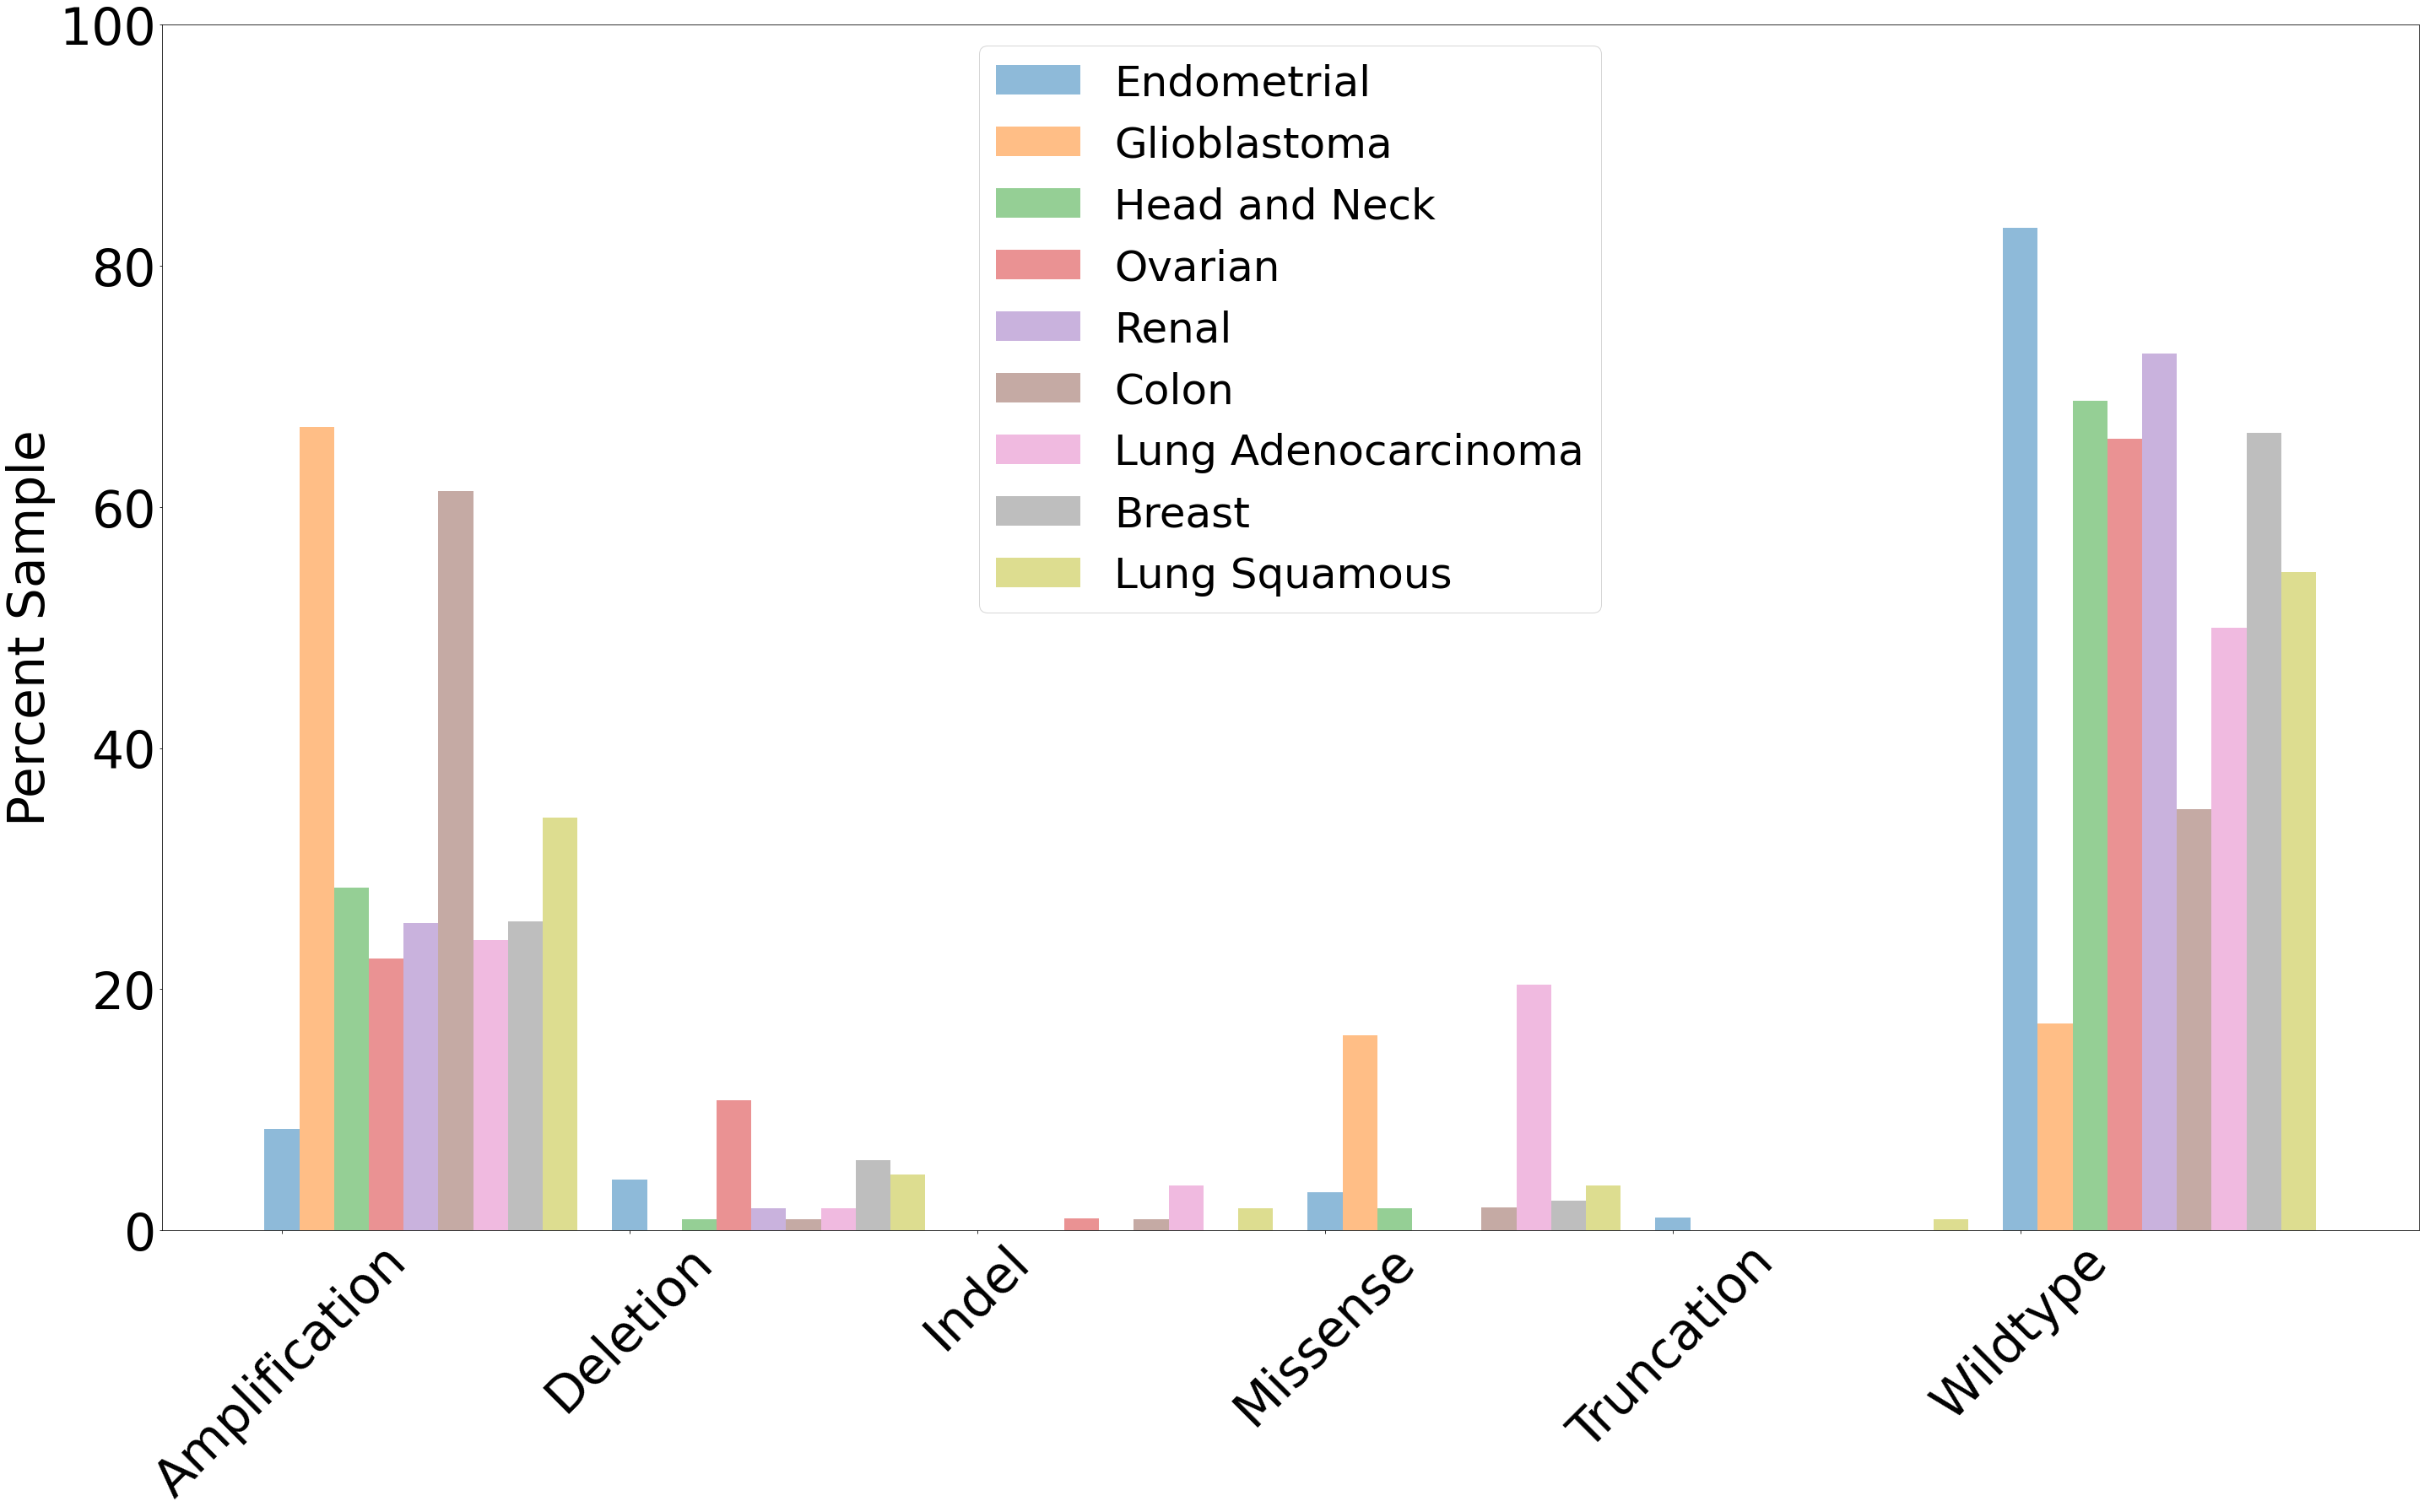

In [8]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
p.figure1_plot_mutations(dfs, names,save_to_path = "png_files/Flagship_fig1.png")

# Step 4: Pancan EGFR mutation status

Repeat steps 1 - 3 using data from the pancan pipeline

load in pancan cptac data

In [9]:
import cptac.pancan as pc
pc_g = pc.PancanGbm()
pc_hn = pc.PancanHnscc()
pc_l = pc.PancanLuad()
pc_o = pc.PancanOv()
pc_c = pc.PancanCcrcc()
pc_col = pc.PancanCoad()
pc_b = pc.PancanBrca()
pc_ls = pc.PancanLscc()
pc_en = pc.PancanUcec()

Call get_geneotype_all_vars for EGFR for each cancer type. 

In [11]:
pc_endo = pc_en.get_genotype_all_vars("EGFR", omics_source = "washu")
pc_gbm = pc_g.get_genotype_all_vars("EGFR", omics_source = "washu")
pc_hnscc = pc_hn.get_genotype_all_vars("EGFR", omics_source = "washu")
pc_ovar = pc_o.get_genotype_all_vars("EGFR", omics_source = "washu")
pc_cc = pc_c.get_genotype_all_vars("EGFR", omics_source = "washu")
pc_colon = pc_col.get_genotype_all_vars("EGFR", omics_source = "washu")
pc_ld = pc_l.get_genotype_all_vars("EGFR", omics_source = "washu")
pc_brca = pc_b.get_genotype_all_vars("EGFR", omics_source = "washu")
pc_lscc = pc_ls.get_genotype_all_vars("EGFR", omics_source = "washu")

In [12]:
#example 
pc_gbm

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00104,Amplification,Amplification,Single_mutation
C3L-00365,Missense_Mutation,p.G665D,Multiple_mutation
C3L-00674,Amplification,Amplification,Single_mutation
C3L-00677,Amplification,Amplification,Single_mutation
C3L-01040,Amplification,Amplification,Single_mutation
...,...,...,...
C3N-03183,Missense_Mutation,p.P596L,Multiple_mutation
C3N-03184,Wildtype_Tumor,No_mutation,Wildtype_Tumor
C3N-03186,Amplification,Amplification,Single_mutation


# Step 5: Match Mutation Labels

Change labels to to match desired final figure.

In [13]:
# Simplify mutation names
dfs = [pc_endo, pc_gbm, pc_hnscc, pc_cc, pc_ld, pc_brca, pc_lscc, pc_colon, pc_ovar]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replaces when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    


In [14]:
dfs = [pc_hnscc, pc_ld, pc_colon, pc_brca]
#Drop Silent mutation type
for df in dfs:
    indexNames = df[ df['Mutation'] == "Silent" ].index
    df.drop(indexNames , inplace=True)

#Drop Intron
dfs = [pc_hnscc, pc_colon]
for df in dfs:
    indexNames = df[ df['Mutation'] == "Intron" ].index
    df.drop(indexNames , inplace=True)  

# Step 6: Create Figure 

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function.

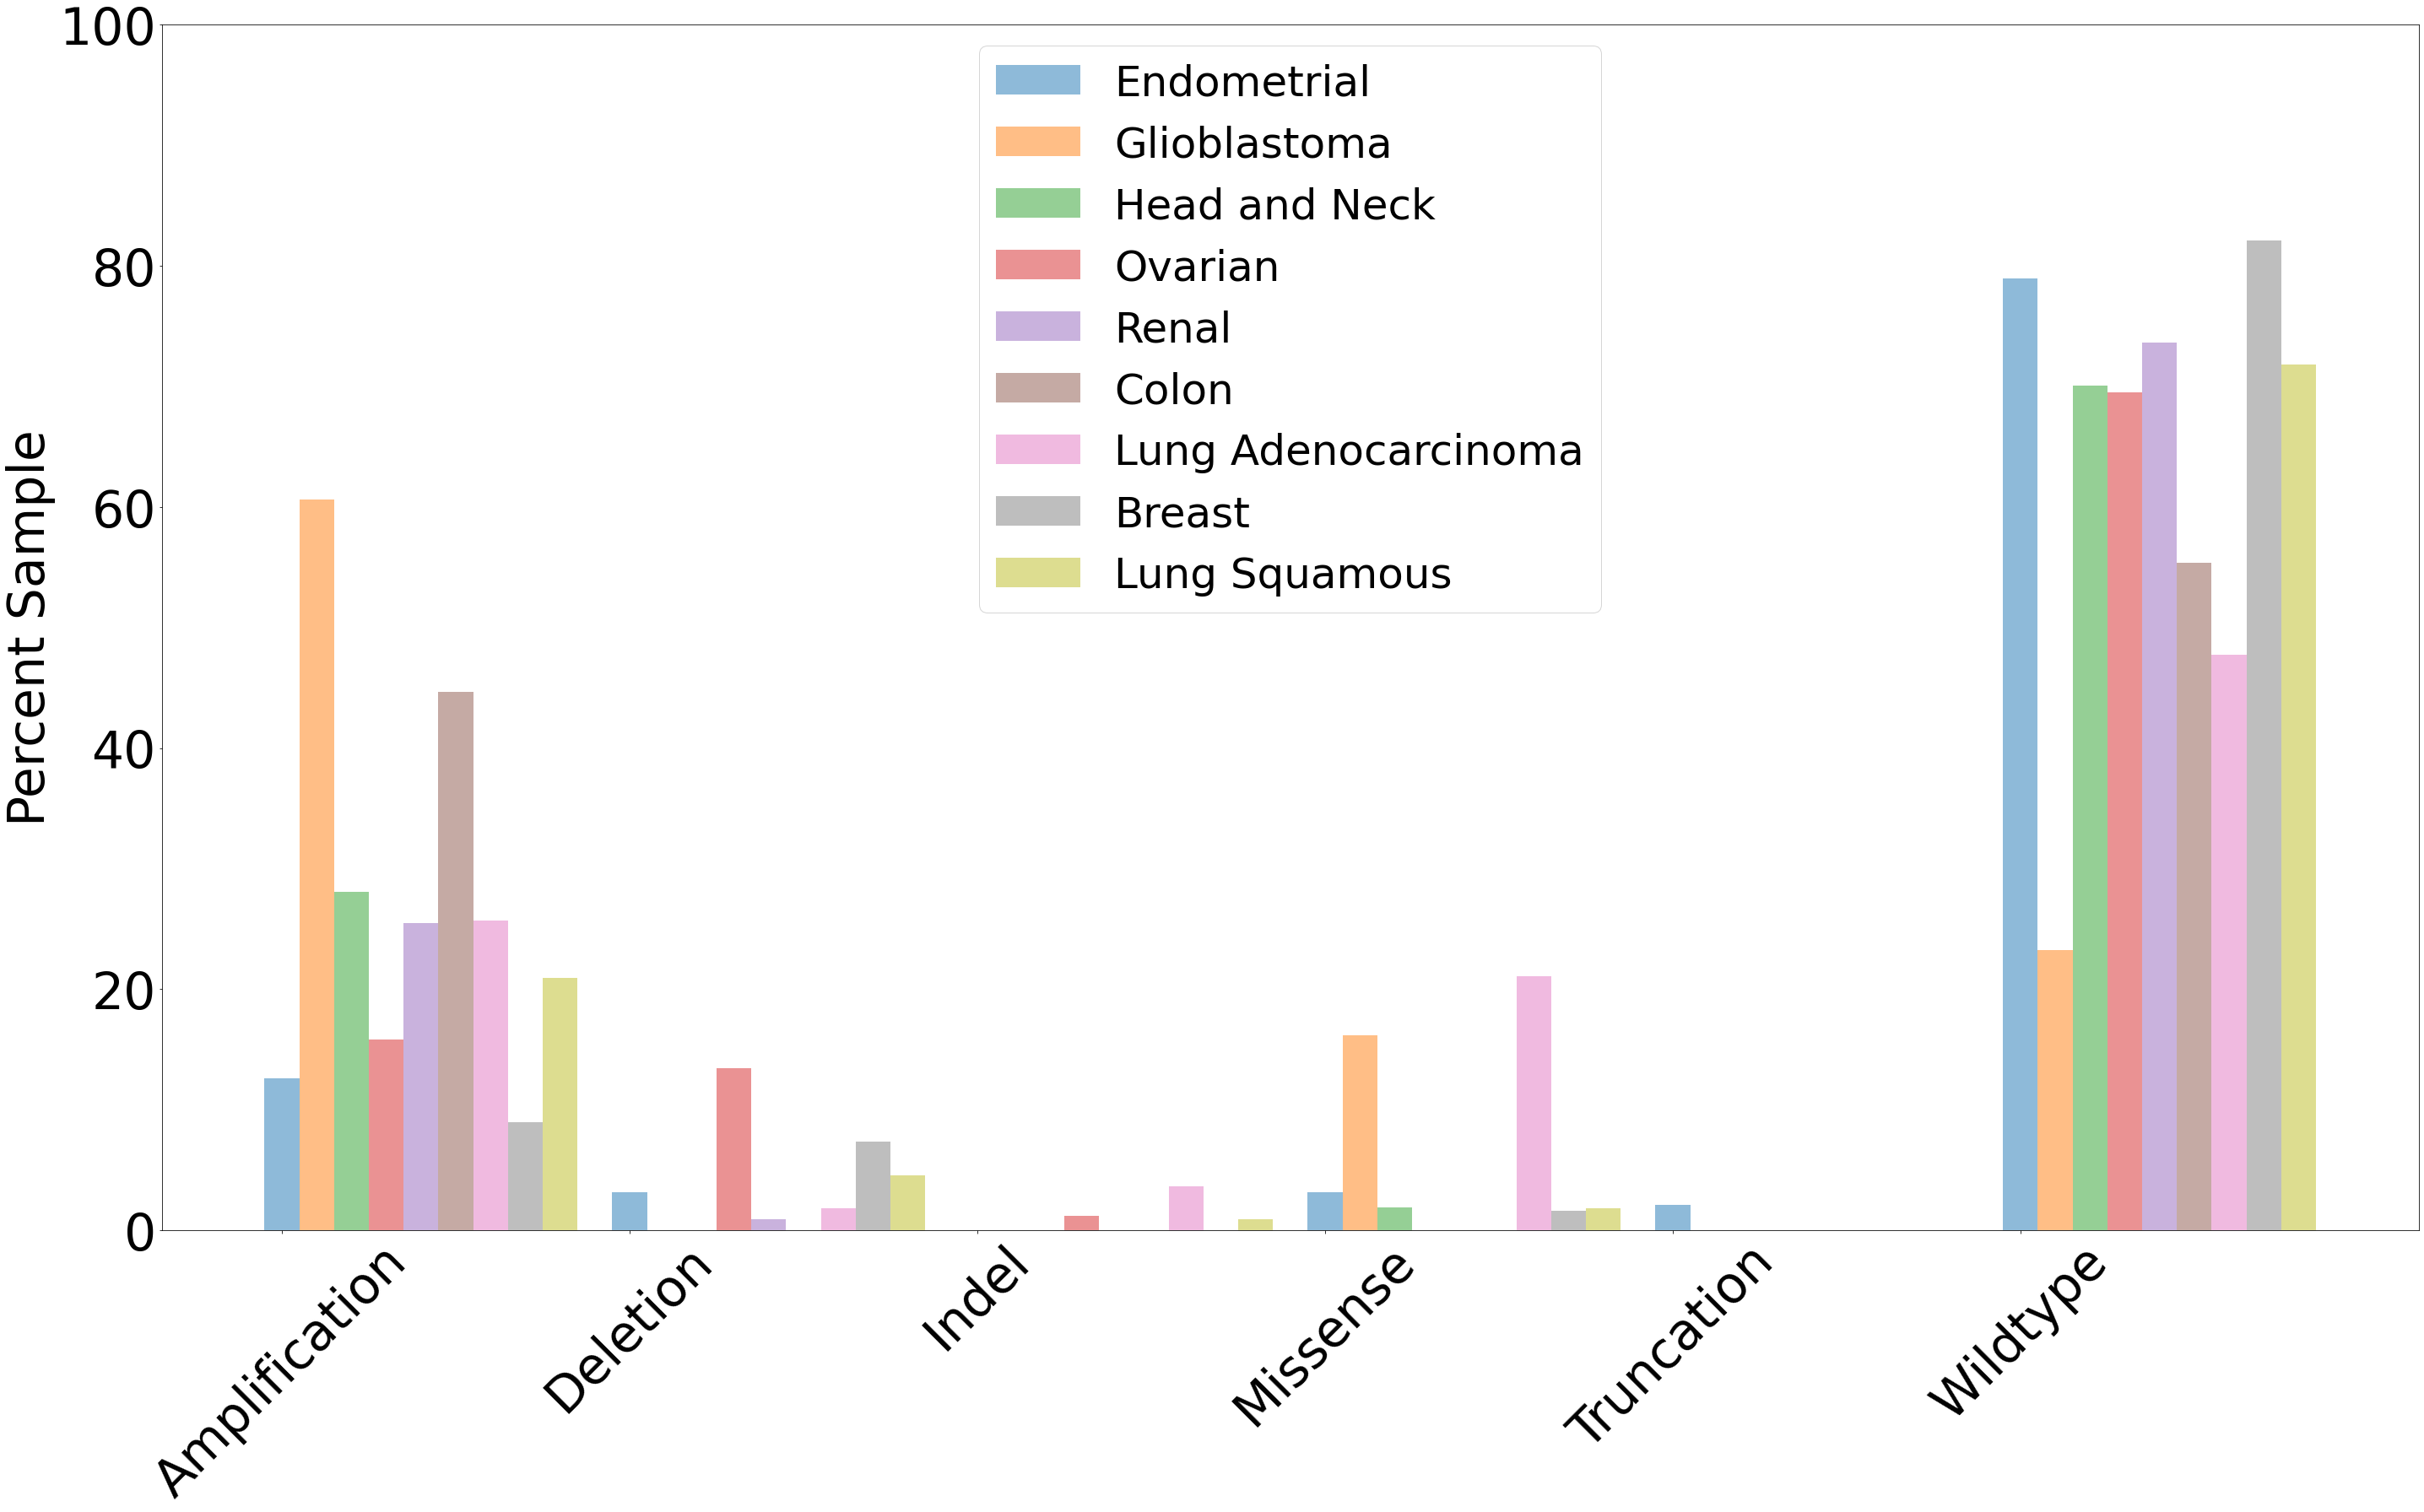

In [15]:
dfs = [pc_endo, pc_gbm, pc_hnscc, pc_ovar, pc_cc, pc_colon, pc_ld, pc_brca, pc_lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
p.figure1_plot_mutations(dfs, names, save_to_path = "png_files/harmonized_fig1.png")

# Compare Percent of samples with Amplification mutations

In [16]:
#Calculate exact percent Flagship and Harmonized
i = 0
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
pancan_dfs = [pc_endo, pc_gbm, pc_hnscc, pc_ovar, pc_cc, pc_colon, pc_ld, pc_brca, pc_lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
for cancer in dfs:
    vc = cancer.Mutation.value_counts()
    pancan_vc = pancan_dfs[i].Mutation.value_counts()
    total = len(cancer)
    pancan_total = len(pancan_dfs[i])
    cnv_amp = vc.Amplification
    pancan_cnv_amp = pancan_vc.Amplification 
    print("Flagship " + names[i])
    print('total_samples:',total,'\n')
    print(cnv_amp,'/',total,'=', cnv_amp/total,'\n')
    print("Harmonized " + names[i])
    print('total_samples:',pancan_total,'\n')
    print(pancan_cnv_amp,'/',pancan_total,'=', pancan_cnv_amp/pancan_total,'\n')
    i += 1
   

Flagship Endometrial
total_samples: 95 

8 / 95 = 0.08421052631578947 

Harmonized Endometrial
total_samples: 95 

12 / 95 = 0.12631578947368421 

Flagship Glioblastoma
total_samples: 99 

66 / 99 = 0.6666666666666666 

Harmonized Glioblastoma
total_samples: 99 

60 / 99 = 0.6060606060606061 

Flagship Head and Neck
total_samples: 109 

31 / 109 = 0.28440366972477066 

Harmonized Head and Neck
total_samples: 107 

30 / 107 = 0.2803738317757009 

Flagship Ovarian
total_samples: 102 

23 / 102 = 0.22549019607843138 

Harmonized Ovarian
total_samples: 82 

13 / 82 = 0.15853658536585366 

Flagship Renal
total_samples: 110 

28 / 110 = 0.2545454545454545 

Harmonized Renal
total_samples: 110 

28 / 110 = 0.2545454545454545 

Flagship Colon
total_samples: 106 

65 / 106 = 0.6132075471698113 

Harmonized Colon
total_samples: 103 

46 / 103 = 0.44660194174757284 

Flagship Lung Adenocarcinoma
total_samples: 108 

26 / 108 = 0.24074074074074073 

Harmonized Lung Adenocarcinoma
total_samples: 10

# Correlations between proteomics Flagship vs Harmonized

In [17]:
og_prot = g.get_proteomics()
pc_prot = pc_g.get_proteomics()

In [31]:
import cptac.utils as u
wiz = pc_prot[["WIZ"]]
wiz = u.reduce_multiindex(wiz ,levels_to_drop = 0)
wiz

Database_ID,ENSP00000500993.1,ENSP00000501256.3,ENSP00000501300.1
Patient_ID,,,
C3L-00104,0.129282,-0.073448,-0.029020
C3L-00365,0.078407,1.806950,0.033808
C3L-00674,0.177530,0.065973,-0.126149
C3L-00677,0.049948,1.964570,0.161229
C3L-01040,0.110757,0.030719,0.066426
...,...,...,...
PT-RN5K.N,-0.753209,NaN,-0.530017
PT-RU72.N,-0.706170,-1.889779,-0.492358
PT-UTHO.N,-0.600093,-0.095237,-0.286616


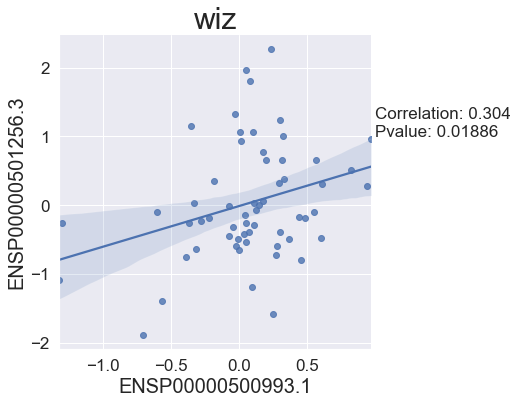

In [34]:
p.plot_pearson(wiz,"ENSP00000500993.1","ENSP00000501256.3" , "none", title = "wiz", ra_stats = True, show_plot = True)


In [20]:
og_prot[["WIZ"]]

Name,WIZ
Patient_ID,
C3L-00104,0.068591
C3L-00365,0.040011
C3L-00674,0.108032
C3L-00677,0.067323
C3L-01040,0.156016
...,...
PT-RN5K.N,-0.625298
PT-RU72.N,-0.823931
PT-UTHO.N,-0.862687


# Check CNV values for Flagship and Harmonized

Especially for Breast and LSCC there is a sigificant difference in the amount of CNV amplification for EGFR. 
Here we show that some samples have substantially different CNV values between the two pipelines

In [ ]:
#Flagship
b.get_
